In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'model_results.csv',sep=',').iloc[:,0:]#transfer_results

In [3]:
data.groupby("model")['model'].count()

model
GRU      624
LASSO    624
LSTM     624
MLP      624
RF       624
SGD      624
Name: model, dtype: int64

In [4]:
#parameters
model_for=[ "MLP","LSTM","GRU","SGD", "RF", "LASSO",]
colour = sns.color_palette("Set1", 15)
index=[3,2,0,5,4,1]
alpha=0.60
group1=1
group2=3
group3=2
deep=0
machine=4
alpha2=0.15

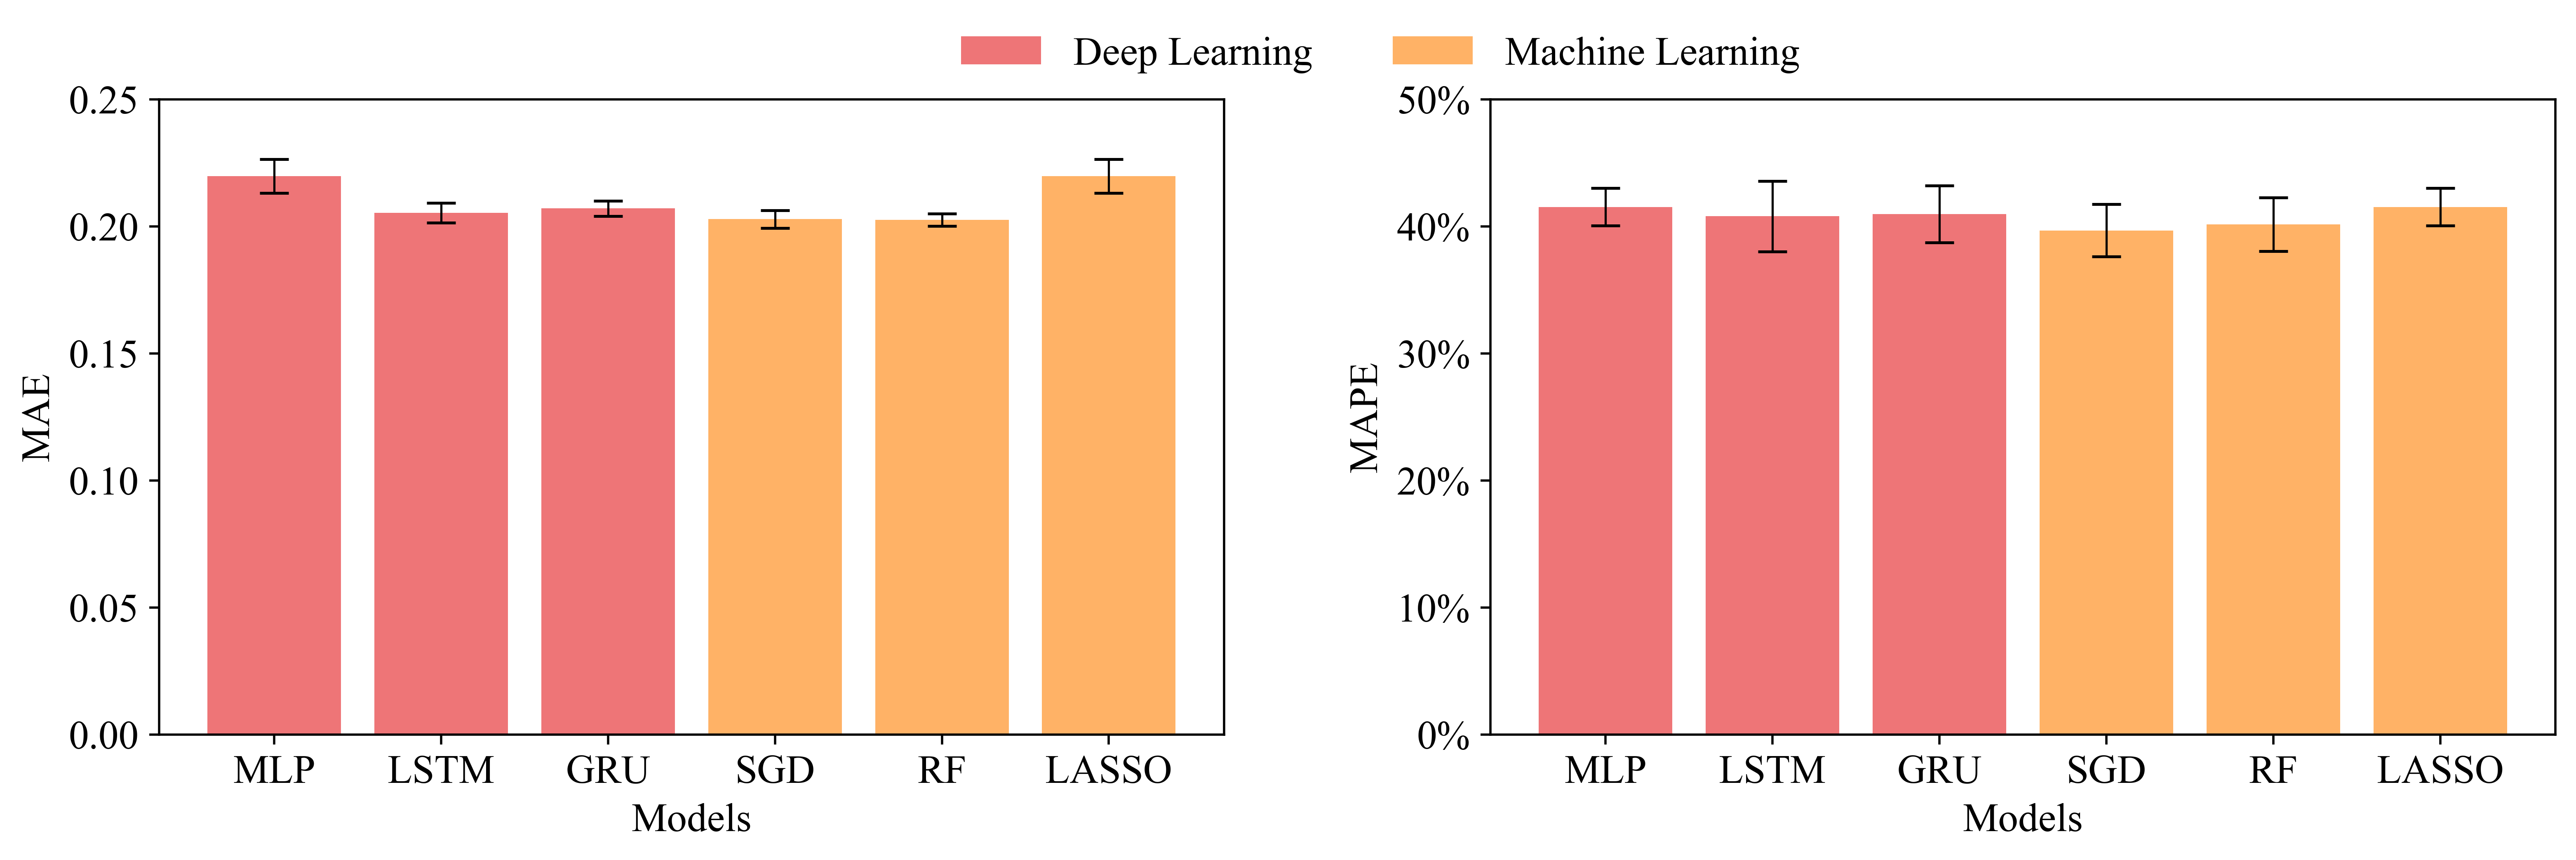

In [6]:
#Applicability_6 models

data1=data#[data['city/station']=="station"]
data1=data1[data1['source \ target']=='wo_trans'] 
data21=data1#[data1['prelen']==1]
data21=data21[data21['trainlen']>=5]

#Figure
fig=plt.figure(figsize=(15,4), dpi=500)
plt.rc('font',family='Times New Roman', size=14)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.25,hspace=0.5)
error_params1=dict(elinewidth=0.75,ecolor="black",capsize=5)#error

#Figure 1
data32=data21[data21['metric']=='mae']
data32['mean']=data32.T.iloc[7:,:].mean()
data34=np.array(data32.groupby( "model")['mean'].agg('std'))[index]
data9=np.array(data32.groupby( "model")["mean"].agg([np.mean]).iloc[:,-1])[index]
plt.subplot(1,2,1)
plt.bar(range(len(model_for)),data9, yerr=data34,error_kw=error_params1,alpha=alpha,
        color=[colour[deep],colour[deep],colour[deep],colour[machine],colour[machine],colour[machine]])
plt.xticks(range(len(model_for)),model_for)
plt.ylim(0,0.25)
plt.ylabel('MAE')
plt.xlabel("Models")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))



#Figure 2
data32=data21[data21['metric']=='mape']
data32['mean']=data32.T.iloc[7:,:].mean()
data34=np.array(data32.groupby( "model")['mean'].agg('std'))[index]
data9=np.array(data32.groupby( "model")["mean"].agg([np.mean]).iloc[:,-1])[index]
plt.subplot(1,2,2)
plt.bar(range(len(model_for)),data9,yerr=data34,error_kw=error_params1,alpha=alpha,
        color=[colour[deep],colour[deep],colour[deep],colour[machine],colour[machine],colour[machine]])
plt.xticks(range(len(model_for)),model_for)

#Labels
plt.bar(0,0.0, color=colour[deep],label="Deep Learning",alpha=alpha,)
plt.bar(2,0.0, color=colour[machine],label="Machine Learning",alpha=alpha,)

plt.ylim(0,0.5)
plt.ylabel('MAPE')
plt.xlabel("Models")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

fig.legend(loc="upper center" , bbox_to_anchor=(0.52, 1), ncol=2, framealpha=0)
fig.show()
plt.savefig('Figure_2_a+b.png', transparent=True, bbox_inches='tight', pad_inches=0.0)

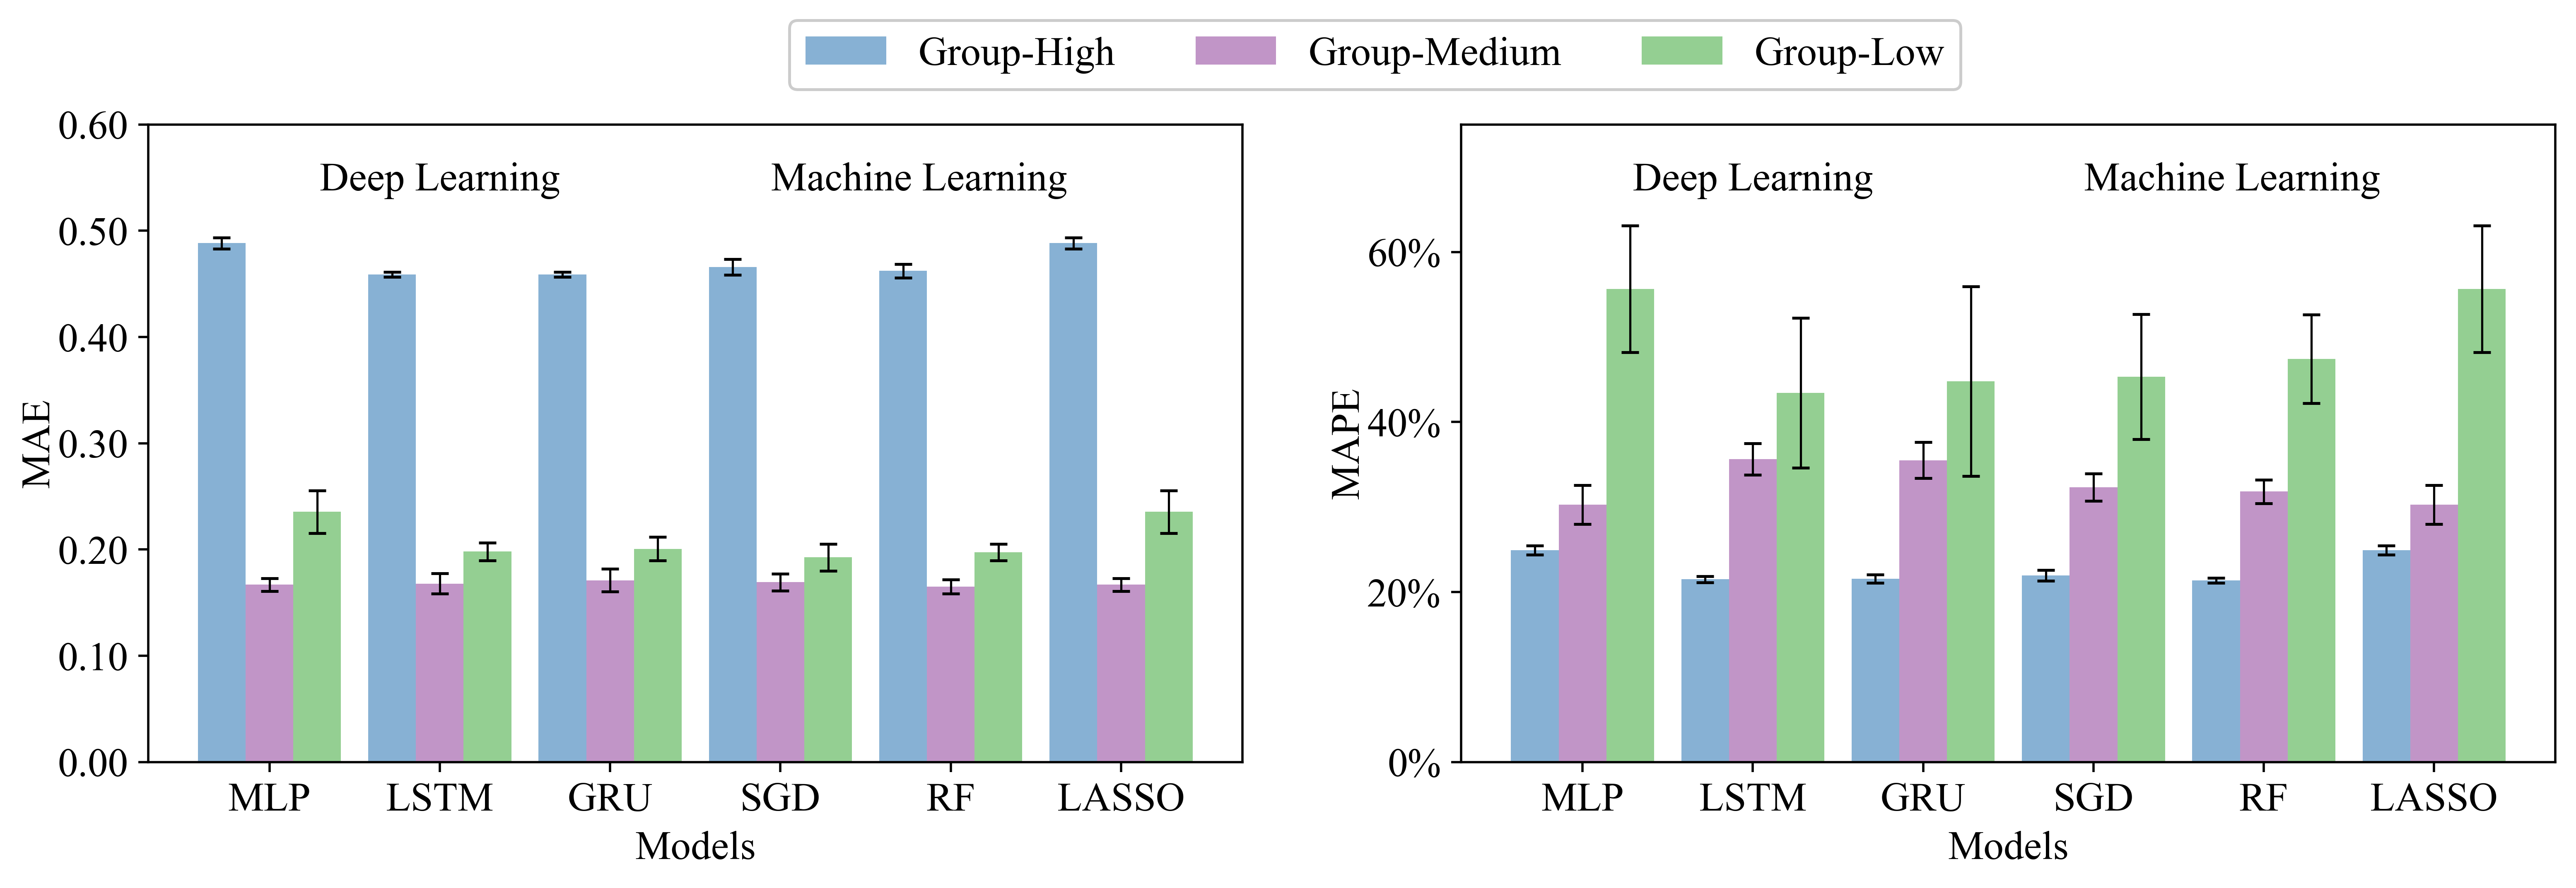

In [7]:
#Applicability_3 group_ deep learning and machine learning

data1=data
data21=data1[data1['source \ target']=='wo_trans'] 
data21=data21[data21['trainlen']>=6]

# Figure
bar_width = 0.28
size=14
fig=plt.figure(figsize=(15,4), dpi=500)
plt.rc('font',family='Times New Roman', size=size)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0.5)
error_params1=dict(elinewidth=0.75,ecolor="black",capsize=3)
bar_1 = list(range(len((model_for))))
bar_2 = [i+bar_width for i in bar_1]
bar_3 = [i+bar_width for i in bar_2]
bar_4=[i+bar_width for i in (0,1,2,3,4,5)]

################################# Figure 1 ################################
#第1个图
h=4
w=0.5
ax=plt.subplot(1,2,1)
bar_10 = np.arange(0.05,6.05,w)
ax.set_facecolor(colour[2])
ax.patch.set_alpha(0)

#group-High
data32=data21[data21['metric']=='mae']
data32=data32[['model',"Perth",'DUNDEE',"HK"]] 
data33=np.array(data32.groupby('model').agg('std').iloc[:,-1])[index]
data9=data32.groupby( "model").agg([np.mean])
data10=np.array(data9.iloc[:,-1])[index]
plt.bar((0,1,2,3,4,5),data10, width=bar_width,yerr=data33,error_kw=error_params1,alpha=alpha,
        color=[colour[group1]],label='Group-High')

#group-Medium
data32=data21[data21['metric']=='mae']
data32=data32[['model',"PALO","Crieff","Aberfeldy","Pitlochry","Kinross"]]
data33=data32.groupby('model').agg('std')
data33['mean']=data33.T.iloc[1:,:].mean()
data34=np.array(data33.iloc[:,-1])[index]
data9=data32.groupby( "model").agg([np.mean])
data9['mean']=data9.T.iloc[1:,:].mean()
data10=np.array(data9.iloc[:,-1])[index]
plt.bar(bar_2, data10, width=bar_width,color=[colour[group2]],alpha=alpha,
        yerr=data34,error_kw=error_params1,label='Group-Medium')

#group-Low
data32=data21[data21['metric']=='mae']
data32 = data32[['model',"BOULDER", "Auchterarder", "Dunkeld", "Blairgowrie"]] #group1
data33=data32.groupby('model').agg('std')
data33['mean']=data33.T.iloc[1:,:].mean()
data34=np.array(data33.iloc[:,-1])[index]
data9=data32.groupby( "model").agg([np.mean])
data9['mean']=data9.T.iloc[1:,:].mean()
data10=np.array(data9.iloc[:,-1])[index]
plt.bar(bar_3, data10, width=bar_width,yerr=data34,alpha=alpha,
        color=[colour[group3]],error_kw=error_params1, label='Group-Low')

#figure details
plt.xticks(bar_4,model_for)   
plt.ylim(0,0.6)
plt.ylabel('MAE',labelpad = 0.01)
plt.xlabel("Models")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.title("Deep Learning                     Machine Learning", family='Times New Roman', 
          y=0.87,x=0.84,size=size, ha='right',weight="light",)

################################# Figure 2 ################################
ax=plt.subplot(1,2,2)
bar_10 = np.arange(0.05,6.05,w)
ax.set_facecolor(colour[2])
ax.patch.set_alpha(0)

#group-High
data32=data21[data21['metric']=='mape']
data32=data32[['model',"Perth",'DUNDEE',"HK"]] #group1
data33=np.array(data32.groupby('model').agg('std').iloc[:,-1])[index]
data9=data32.groupby( "model").agg([np.mean])
data10=np.array(data9.iloc[:,-1])[index]
plt.bar((0,1,2,3,4,5),data10, width=bar_width,yerr=data33,alpha=alpha,error_kw=error_params1,color=[colour[group1]],)

#group-Medium
data32=data21[data21['metric']=='mape']
data32=data32[['model',"PALO","Crieff","Aberfeldy","Pitlochry","Kinross"]]
data33=data32.groupby('model').agg('std')
data33['mean']=data33.T.iloc[1:,:].mean()
data34=np.array(data33.iloc[:,-1])[index]
data9=data32.groupby( "model").agg([np.mean])
data9['mean']=data9.T.iloc[1:,:].mean()
data10=np.array(data9.iloc[:,-1])[index]
plt.bar(bar_2, data10, width=bar_width,color=[colour[group2]],alpha=alpha,
        yerr=data34,error_kw=error_params1, )

#group-Low
data32=data21[data21['metric']=='mape']
data32=data32[['model',"BOULDER", "Auchterarder", "Dunkeld", "Blairgowrie"]] #group1
data33=data32.groupby('model').agg('std')
data33['mean']=data33.T.iloc[1:,:].mean()
data34=np.array(data33.iloc[:,-1])[index]
data9=data32.groupby( "model").agg([np.mean])
data9['mean']=data9.T.iloc[1:,:].mean()
data10=np.array(data9.iloc[:,-1])[index]
plt.bar(bar_3, data10, width=bar_width,color=[colour[group3]],alpha=alpha,yerr=data34,error_kw=error_params1, )
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

#figure details
plt.xticks(bar_4,model_for)
plt.ylim(0.,0.75)
plt.ylabel('MAPE',labelpad = 0.01)
plt.xlabel("Models")
plt.title("      Deep Learning                     Machine Learning", family='Times New Roman',y=0.87,x=0.84,size=size, ha='right',weight="light",)

fig.legend(loc="upper center" , bbox_to_anchor=(0.52, 1.03), ncol=3, framealpha=1)

plt.savefig('Figure_2_c+d.png', transparent=True, bbox_inches='tight', pad_inches=0.0)

Appliacbility_3 groups_6 models


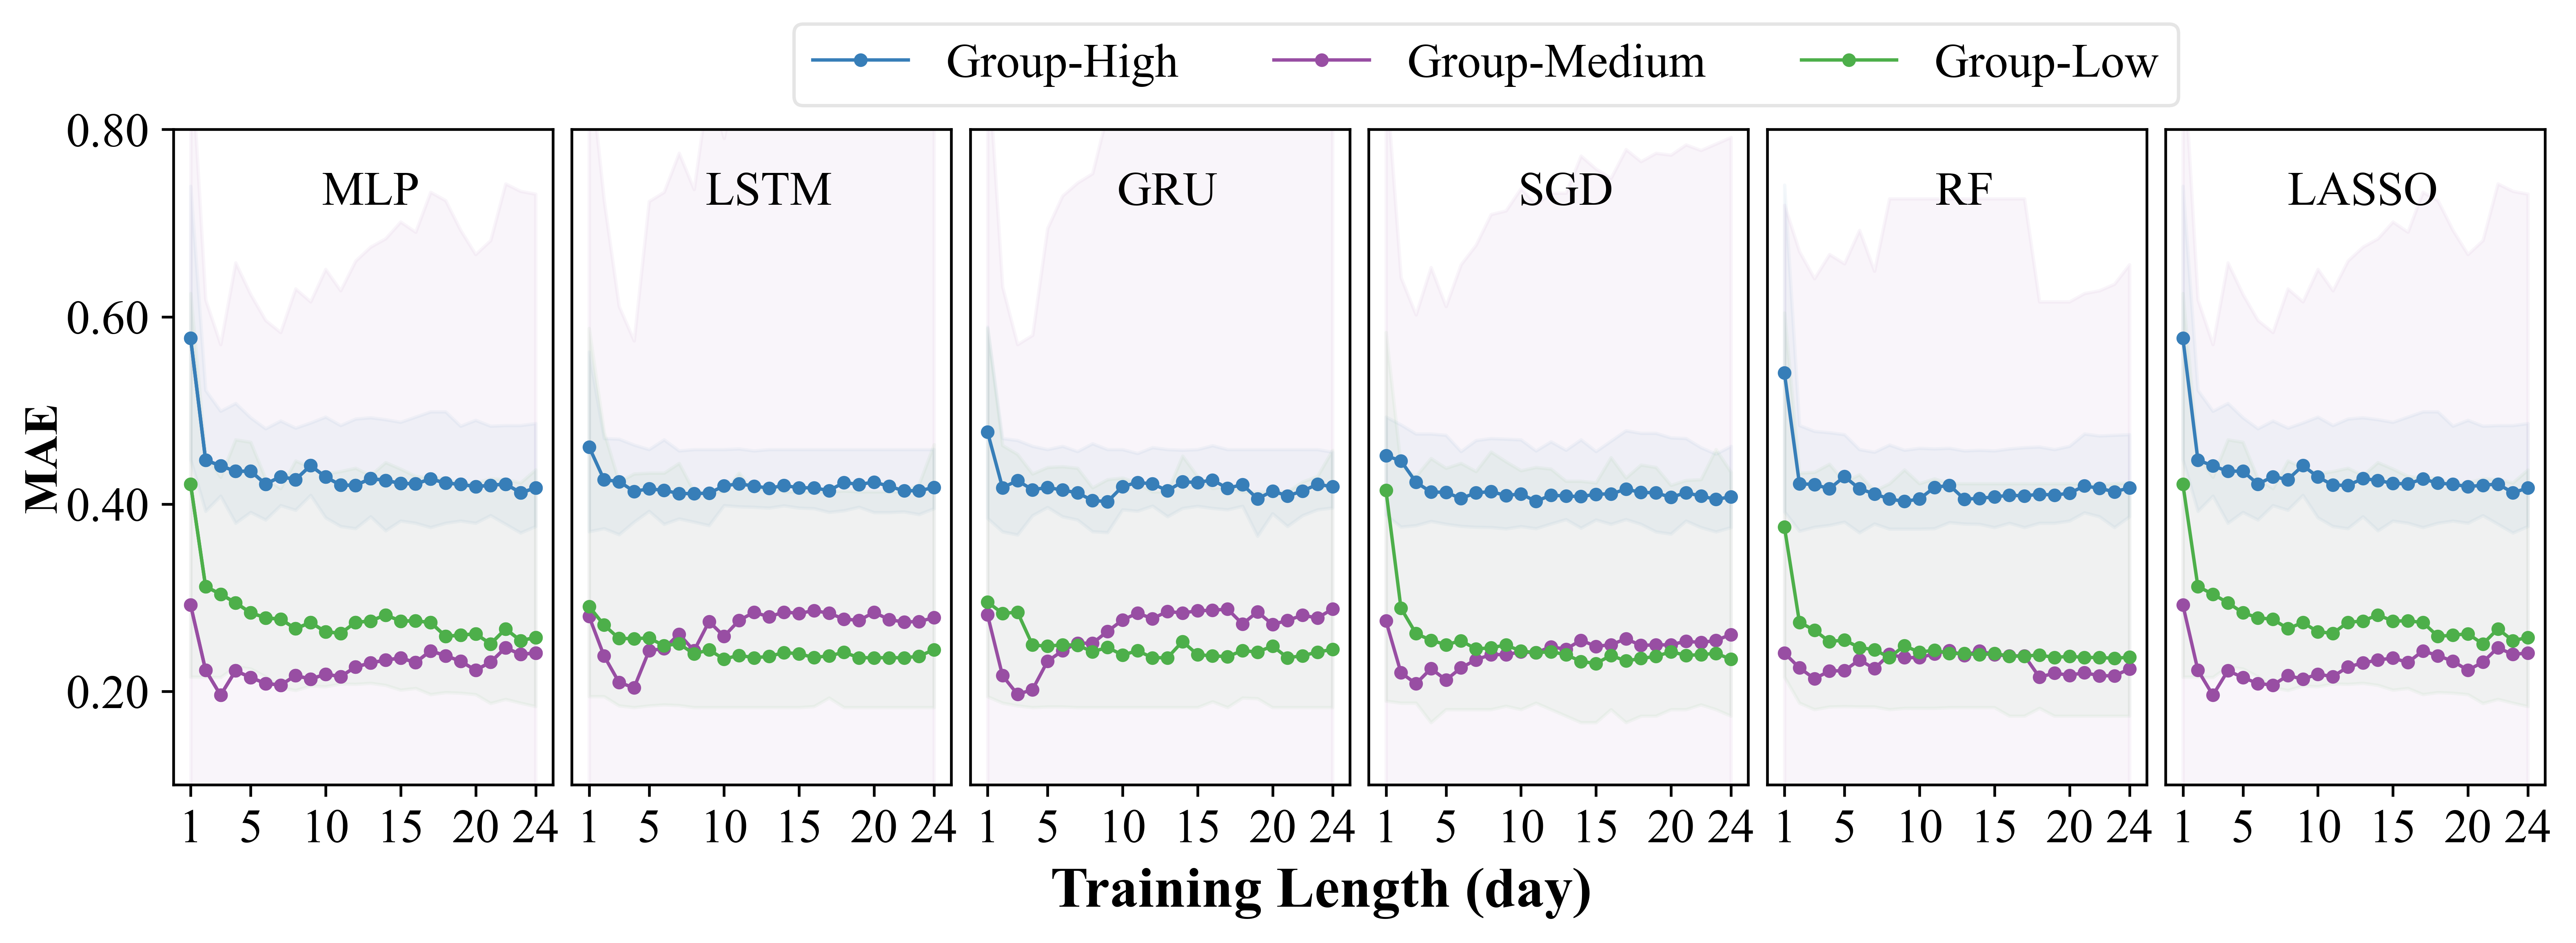

In [8]:
# Appliacbility_3 groups_6 models
print("Appliacbility_3 groups_6 models")
 
model_for=["MLP","LSTM","GRU","SGD", "RF", "LASSO",]
colour = sns.color_palette("Set1", 15)
data1=data
data21=data1[data1['source \ target']=='wo_trans'] 

#figure
n=0
a=2
b=6
e=12.5
f=8
alpha=0.60
group1=1
group2=3
group3=2
size=14

fig=plt.figure(figsize=(e,f), dpi=600,)
plt.rc('font',family='Times New Roman', size=size,)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.05,hspace=0.3)

#for Group-High
for j in range(0,6):
    n=n+1
    data31=data21[data21['metric']=='mae']
    data31=data31[['model',"Perth",'DUNDEE',"HK"]]
    data31['mean']=data31.T.iloc[1:,:].mean()
    data31['max_val']=data31.iloc[:,1:].max(axis=1)
    data31['min_val']=data31.iloc[:,1:].min(axis=1)
    data33=data31[data31['model']== model_for[j]]
    t=data33['mean']#.astype(float)
    p=range(1,len(t)+1)
    ax = plt.subplot(a,b,j+1)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    if j==0:
            ax.plot(p,t, color=colour[group1],linestyle = "-",marker=".",linewidth=1,label="Group-High")
    ax.plot(p,t, color=colour[group1],linestyle = "-",marker=".",linewidth=1,)
    plt.fill_between(p, data33["min_val"], data33["max_val"],color=colour[group1],alpha=0.05)        
    plt.xticks(range(1,t.shape[0]+2,3))

                
# for Group-Medium
for j in range(0,6):
    n=n+1
    data31=data21[data21['metric']=='mae']
    data31=data31[['model',"PALO","Crieff","Aberfeldy","Pitlochry"]]
    data31['mean']=data31.T.iloc[1:,:].mean()
    data31['max_val']=data31.iloc[:,1:].max(axis=1)
    data31['min_val']=data31.iloc[:,1:].min(axis=1)
    data33=data31[data31['model']== model_for[j]]
    t=data33["mean"]#.astype(float)
    p=range(1,len(t)+1)
    ax = plt.subplot(a,b,j+1)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    if j==0:
        ax.plot(p,t, color=colour[group2],linestyle = "-",marker=".",linewidth=1,label="Group-Medium")
    ax.plot(p,t, color=colour[group2],linestyle = "-",marker=".",linewidth=1)
    plt.fill_between(p, data33["min_val"], data33["max_val"],color=colour[group2],alpha=0.05)   

                
# for group-Low
for j in range(0,6):
    n=n+1
    data31=data21[data21['metric']=='mae']
    data31=data31[['model',"Kinross","BOULDER", "Auchterarder", "Dunkeld", "Blairgowrie"]] #group3
    data31['mean']=data31.T.iloc[1:,:].mean()
    data31['max_val']=data31.iloc[:,1:].max(axis=1)
    data31['min_val']=data31.iloc[:,1:].min(axis=1)
    data33=data31[data31['model']== model_for[j]]
    t=data33["mean"]#.astype(float)
    ax = plt.subplot(a,b,j+1)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    if j==0:
        ax.plot(range(1,len(t)+1),t, color=colour[group3],linestyle = "-",marker=".",linewidth=1,label="Group-Low")
    ax.plot(range(1,len(t)+1),t, color=colour[group3],linestyle = "-",marker=".",linewidth=1,)
    plt.fill_between(p, data33["min_val"], data33["max_val"],color=colour[group3],alpha=0.05)

    plt.xticks([1,5,10,15,20,24])
    if j==0:
        plt.ylabel('MAE',labelpad = 0.01,weight = 'extra bold')           
    else:
        plt.gca().axes.yaxis.set_visible(False)
        plt.yticks([])
    ax.text(13, 0.72, model_for[j], ha="center",family='Times New Roman', size=size,weight="light",)
    plt.ylim(0.1,0.8)

fig.suptitle('Training Length (day)',y=0.49,ha='center',va='center',weight = 'extra bold')
fig.legend(loc="lower left" , bbox_to_anchor=(0.32, 0.88), ncol=3, framealpha=0.5)
fig.show()
plt.savefig('Figure_2_e.png', transparent=True, bbox_inches='tight', pad_inches=0.0)